In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as md
import pandas as pd
from datetime import datetime, timedelta

plt.style.use('/Users/mueller/Projects/GitRepos/ICARUSNoiseAnalysis/plot_style.mplstyle')

In [2]:
input_path = '/Users/mueller/Downloads/dump_for_Justin_update_10Sep2023.txt'
output_path = '/Users/mueller/Downloads/lifetime.pdf'
annotations = {'': datetime(2021,5,28,16),
               'Run 0': datetime(2021,6,27,0),
               'E. LAr Pump Repair': datetime(2021,10,26,0),
               'Venting Pause': datetime(2021,11,29,0),
               ' ': datetime(2022,6,8,4),
               'Run 1': datetime(2022,7,9,8),
               'Pump Maintenance': datetime(2022,9,14,19),
               'West Filter Regeneration': datetime(2022,11,7,10),
               'Start Run 2': datetime(2022,12,20,17),
               'End Run 2': datetime(2023,7,14,8)}

In [3]:
def import_data(path):
    """
    Loads the electron lifetime data from the input text files. The
    file contains a space-separated list of measurements.

    Parameters
    ----------
    path: str
        The full path of the input file containing the lifetime
        measurements.

    Returns
    -------
    east: np.array
        NumPy array with shape (N, 3) reflecting N measurements with
        a timestamp (unix time), the central value of the lifetime
        measurement, and the associated error on the measurement.
        East cryostat only.
    west: np.array
        NumPy array with shape (N, 3) reflecting N measurements with
        a timestamp (unix time), the central value of the lifetime
        measurement, and the associated error on the measurement.
        West cryostat only.
    """
    input_data = [x.strip('\n') for x in open(path, 'r').readlines()]
    e0 = input_data.index(' DUMP EAST ')
    w0 = input_data.index(' DUMP WEST ')
    east = np.array([x.split(' ')[1:5] for x in input_data[e0+1:w0] if len(x) > 5])
    west = np.array([x.split(' ')[1:5] for x in input_data[w0+1:] if len(x) > 5])
    east = east[np.all(east != '', axis=1)].astype(float)
    west = west[np.all(west != '', axis=1)].astype(float)
    print(f'Found {east.shape[0]} measurements.')
    return east, west

def annotate_lifetime(ax, time, label):
    """
    Places an annotation on the axis with the specified time and
    label.

    Parameters
    ----------
    ax: matplotlib.pyplot.axis
        The axis to annotate.
    time: datetime.datetime
        The time to attach the annotation to.
    label: str
        The label for the annotation.

    Returns
    -------
    None.
    """
    label_dt = timedelta(days=-18)
    plt.axvline(time, linestyle='--', c='black')
    ax.text(time+label_dt, 11.5, label, rotation=90,
            verticalalignment='top', fontsize=20)
    
def make_lifetime_plot(input_path, annotations, output_path):
    """
    Makes an annotated plot of the electron lifetime at ICARUS using
    the input text files.

    Parameters
    ----------
    input_path: str
        The full path of the input text files.
    annotations: dict
        The dictionary that contains (key,value) pairs of labels and
        the associated time.
    output_path: str
        The full path for the output image.

    Returns
    -------
    None.
    """
    east, west = import_data(input_path)
    figure = plt.figure(figsize=(18,6))
    ax = figure.add_subplot()
    ax.errorbar([datetime.fromtimestamp(x) for x in east[:,0]], east[:,1], yerr=east[:,2:].transpose(), fmt='o', elinewidth=2, label='East')
    ax.errorbar([datetime.fromtimestamp(x) for x in west[:,0]], west[:,1], yerr=west[:,2:].transpose(), fmt='o', elinewidth=2, label='West')
    ax.xaxis.set_major_locator(md.MonthLocator(bymonth=(1,4,7,10)))
    ax.xaxis.set_major_formatter(md.DateFormatter('%b-%Y'))
    start = datetime(2020,9,1,0)
    end = datetime(2023,9,15,0)
    ax.set_xlim(start, end)
    ax.set_ylim(0, 12)
    ax.set_xlabel('Date')
    ax.set_ylabel('Electron Lifetime [ms]')
    ax.legend(markerscale=4)
    figure.suptitle('ICARUS Electron Lifetime')

    for k, v in annotations.items():
        annotate_lifetime(ax, v, k)

    figure.savefig(output_path)

Found 1740 measurements.


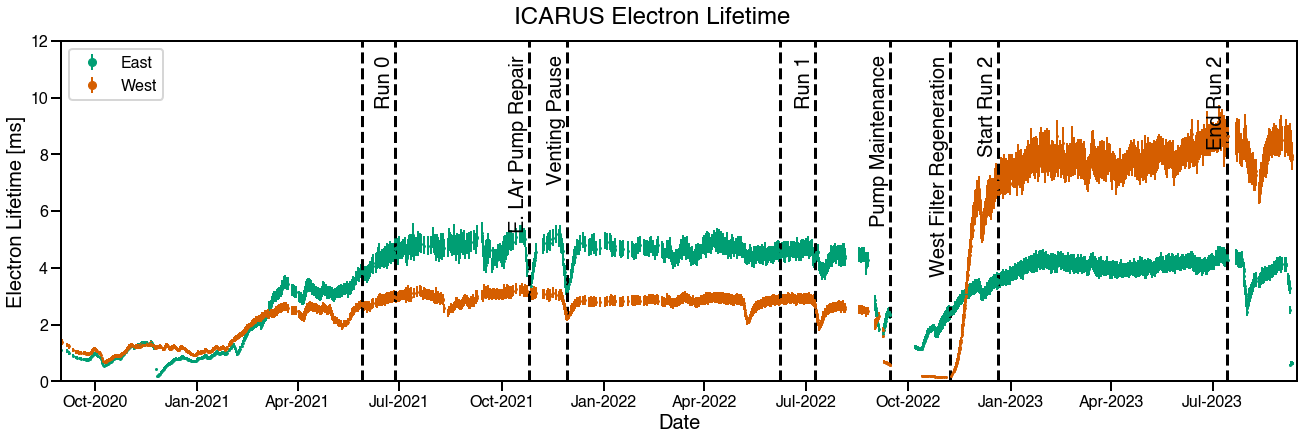

In [4]:
make_lifetime_plot(input_path, annotations, output_path)